In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from pathlib import Path
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab
import PIL
%matplotlib inline


In [8]:
# dct and idct functions declaration

pylab.rcParams['figure.figsize'] = (20.0, 7.0)

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


# computing DCT features of one group and storing in a .npy file for later concatination

entries = Path('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\menigiomia')
i = 0
for entry in entries.iterdir():
    filename, _ = os.path.splitext(entry.name)
    im = misc.imread('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\menigiomia\\'+filename+'.jpg')
    imsize = im.shape
    dct = np.zeros(imsize)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
    
    np.save('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\menigiomia\\'+filename+'.npy', dct)
    #if i == 0:
    #    features = dct
    #    i = 5
    #else:
    #    features = np.concatenate(([features], [dct]), axis = 0)
    #np.save('C:\\Users\\dell\\Desktop\\resized\\pituirity\\'+filename+'.npy',dct)
    #if np.load('C:\\Users\\dell\\Desktop\\resized\\dct_features.npy') is non:

C:\Users\dell\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [55]:
dct.shape

(512, 512)

In [77]:
np.load('C:\\Users\\dell\\Desktop\\resized\\pituirity\\3.0---97481-i1588.npy')
np.savetxt("C:\\Users\\dell\\Desktop\\resized\\features32.txt" ,b ,fmt='%3.4f' , delimiter=' ',newline=' ')

Text(0.5, 1.0, '8x8 DCTs of the image')

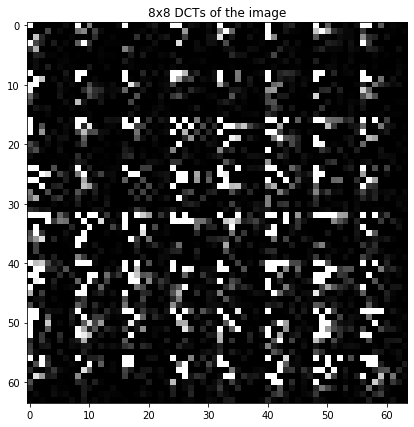

In [40]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

In [41]:
type(dct)

numpy.ndarray

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [46]:
pos = 8
# Extract a block from imagge
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")
# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

(20, 4096)


In [76]:
features = np.zeros((60, 262144), dtype=np.float32)
entries = list(Path('C:\\Users\\dell\\Desktop\\resized\\giomia').glob('*npy'))
i = 0;
for entry in entries:
    array = np.load(entry).flatten()
    features[i] = array
    i += 1
    #features = np.append(features,[array])
print(features.shape)

(60, 262144)


In [11]:
#loading and combining all feautes of all three groups into one vector 'feauture'

feature = np.empty((60,4096))
print(feature.shape)
i = 0
entries = list(Path('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\giomia').glob('*npy'))
print(len(entries))
i = 0;
for img in entries:
    arr = np.load(img).flatten()
    if i == 0:
        feature = [np.asarray(arr)]
        i = i+1
    else:
        feature = np.append(feature, [arr], axis=0)
    i += 1
entries = list(Path('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\menigiomia').glob('*npy'))
print(len(entries))
for img in entries:
    arr = np.load(img).flatten()
    feature = np.append(feature, [arr], axis=0)
entries = list(Path('C:\\Users\\dell\\Desktop\\IP Project\\To Detect\\pituirity').glob('*npy'))
print(len(entries))
i = 0;
for img in entries:
    arr = np.load(img).flatten()
    feature = np.append(feature, [arr], axis=0)
print(feature.shape)

(60, 4096)
20
20
20
(60, 262144)


In [78]:
dct = list(Path('C:\\Users\\dell\\Desktop\\resized\\pituirity').glob('*npy'))
dwt = list(Path('C:\\Users\\dell\\Desktop\\resized\\pituirity').glob('*npy'))
i = 40;
for entry in entries:
    array = np.load(entry).flatten()
    features[i] = array
    i += 1
    #features = np.append(features,[array])
print(features.shape)

(60, 262144)


In [13]:
# declaring class' labels 

classes = ['Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 
           'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia', 'Giomia',
           'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia',
           'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia',
           'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 
          'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity']

In [27]:
# loading features and labels

for i in range(20):
    classes[i] = 'Gliomia';
    
for i in range(20):
    classes[20+i] = 'Menigiomia';
    
for i in range(20):
    classes[40+i] = 'Pituirity';
features = np.load('combined_features.npy')
len(classes)

60

In [174]:
print(classes)
features.shape

['Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Gliomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Menigiomia', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity', 'Pituirity']


(60, 4096)

In [35]:
# spliting dataset and training

X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.40, random_state=22)
#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma = 'scale') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9583333333333334


In [36]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  0]
 [ 0  1  6]]
              precision    recall  f1-score   support

     Gliomia       1.00      1.00      1.00        10
  Menigiomia       0.88      1.00      0.93         7
   Pituirity       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.96      0.95      0.95        24
weighted avg       0.96      0.96      0.96        24



Text(0.5, 1, 'Confusion Matrix')

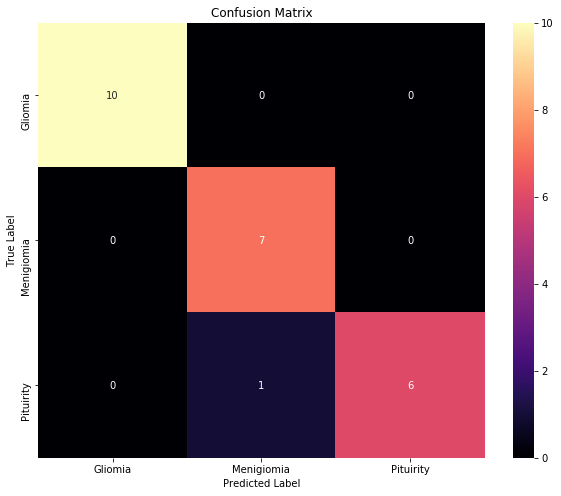

In [38]:
import seaborn as sns
index = ['Gliomia','Menigiomia', 'Pituirity']  
#columns = ['APT 1','APT 10', 'APT 19','APT 21','APT 28','APT 29','APT 30','Dark Hotel', 'Energetic Bear', 'Equation Group', 'Gorgon Gruop', 'Winnti']  
#cm_df = pd.DataFrame(cm,columns,index)                      

matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix,annot=True, cmap='magma', fmt='d', ax = ax, vmin=0, vmax=10, xticklabels=index, yticklabels=index)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [320]:
import scikitplot as skplt
import matplotlib.pyplot as plt
print(len(y_test))
y_pred2 = y_pred.flatten()
skplt.metrics.plot_roc_curve(y_true, y_pred2)
plt.show()

12


IndexError: too many indices for array

In [327]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [66]:
#concatenating both dct and dwt features
i = 0
feature = np.empty((20,4096))
dct = list(Path('C:\\Users\\dell\\Desktop\\dct\\giomia').glob('*npy'))
for entry in dct:
    array = np.load(entry).flatten()
    feature[i] = np.append(array, dwt_arr[i,:])
    i += 1

In [57]:
np.save('C:\\Users\\dell\\Desktop\\dct\\gliomia_features.npy', feature)

In [62]:
# combining features of classes into one vector
i = 0
feature = np.empty((60,5120))
dct = list(Path('C:\\Users\\dell\\Desktop\\dct').glob('*npy'))
for vector in dct:
    array = np.load(vector)
    if i == 0:
        feature = np.asarray(array)
        i = i+1
    else:
        feature = np.append(feature, array, axis = 0)

In [25]:
np.load('dwt_gliomia.npy').shape

(20, 1024)

In [ ]:
np.load()